##  Install Dependencies and Bring in Data:

In [3]:
!pip install tensorflow  pandas matplotlib scikit-learn

  Using cached tensorflow-2.19.0-cp312-cp312-macosx_12_0_arm64.whl.metadata (4.0 kB)
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 252.7/252.7 MB 3.6 MB/s eta 0:00:0000:0100:02
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 10.6/10.6 MB 3.9 MB/s eta 0:00:00 0:00:01
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 1.4/1.4 MB 4.6 MB/s eta 0:00:00a 0:00:01
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 25.8/25.8 MB 3.8 MB/s eta 0:00:0000:0100:01
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 670.4/670.4 kB 5.6 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 5.5/5.5 MB 4.0 MB/s eta 0:00:00a 0:00:01


In [4]:
!pip install keras

In [5]:
import numpy as np
import os
import pandas as pd
import tensorflow as tf

Matplotlib is building the font cache; this may take a moment.


In [6]:
np.expand_dims??

Signature:       np.expand_dims(a, axis)
Call signature:  np.expand_dims(*args, **kwargs)
Type:            _ArrayFunctionDispatcher
String form:     <function expand_dims at 0x108304360>
File:            /opt/anaconda3/lib/python3.12/site-packages/numpy/lib/shape_base.py
Source:         
@array_function_dispatch(_expand_dims_dispatcher)
def expand_dims(a, axis):
    """
    Expand the shape of an array.

    Insert a new axis that will appear at the `axis` position in the expanded
    array shape.

    Parameters
    ----------
    a : array_like
        Input array.
    axis : int or tuple of ints
        Position in the expanded axes where the new axis (or axes) is placed.

        .. deprecated:: 1.13.0
            Passing an axis where ``axis > a.ndim`` will be treated as
            ``axis == a.ndim``, and passing ``axis < -a.ndim - 1`` will
            be treated as ``axis == 0``. This behavior is deprecated.

        .. versionchanged:: 1.18.0
            A tuple of axes is now 

In [9]:
df = pd.read_csv("train.csv/train.csv")

In [10]:
df.head()

,id,comment_text,toxic,severe_toxic,obscene,threat,insult,identity_hate
0,0000997932d777bf,Explanation\nWhy the edits made under my usern...,0,0,0,0,0,0
1,000103f0d9cfb60f,D'aww! He matches this background colour I'm s...,0,0,0,0,0,0
2,000113f07ec002fd,"Hey man, I'm really not trying to edit war. It...",0,0,0,0,0,0
3,0001b41b1c6bb37e,"""\nMore\nI can't make any real suggestions on ...",0,0,0,0,0,0
4,0001d958c54c6e35,"You, sir, are my hero. Any chance you remember...",0,0,0,0,0,0


In [13]:
df.describe()

,toxic,severe_toxic,obscene,threat,insult,identity_hate
count,159571.000000,159571.000000,159571.000000,159571.000000,159571.000000,159571.000000
mean,0.095844,0.009996,0.052948,0.002996,0.049364,0.008805
std,0.294379,0.099477,0.223931,0.054650,0.216627,0.093420
min,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
25%,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
50%,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
75%,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
max,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000


In [15]:
df.shape

(159571, 8)

In [16]:
df.iloc[0]['comment_text']

"Explanation\nWhy the edits made under my username Hardcore Metallica Fan were reverted? They weren't vandalisms, just closure on some GAs after I voted at New York Dolls FAC. And please don't remove the template from the talk page since I'm retired now.89.205.38.27"

In [17]:
df[df.columns[2:]].iloc[0]

toxic            0
severe_toxic     0
obscene          0
threat           0
insult           0
identity_hate    0
Name: 0, dtype: int64

In [18]:
df.iloc[4]['comment_text']

"You, sir, are my hero. Any chance you remember what page that's on?"

In [19]:
df[df.columns[2:]].iloc[4]

toxic            0
severe_toxic     0
obscene          0
threat           0
insult           0
identity_hate    0
Name: 4, dtype: int64

In [20]:
df[df['toxic']==1].head()

,id,comment_text,toxic,severe_toxic,obscene,threat,insult,identity_hate
6,0002bcb3da6cb337,COCKSUCKER BEFORE YOU PISS AROUND ON MY WORK,1,1,1,0,1,0
12,0005c987bdfc9d4b,Hey... what is it..\n@ | talk .\nWhat is it......,1,0,0,0,0,0
16,0007e25b2121310b,"Bye! \n\nDon't look, come or think of comming ...",1,0,0,0,0,0
42,001810bf8c45bf5f,You are gay or antisemmitian? \n\nArchangel WH...,1,0,1,0,1,1
43,00190820581d90ce,"FUCK YOUR FILTHY MOTHER IN THE ASS, DRY!",1,0,1,0,1,0


In [21]:
df[df.columns[2:]].iloc[6]

toxic            1
severe_toxic     1
obscene          1
threat           0
insult           1
identity_hate    0
Name: 6, dtype: int64

## 1. PREPROCESSING:

In [23]:
from tensorflow.keras.layers import TextVectorization

In [24]:
TextVectorization??

Init signature:
TextVectorization(
    max_tokens=None,
    standardize='lower_and_strip_punctuation',
    split='whitespace',
    ngrams=None,
    output_mode='int',
    output_sequence_length=None,
    pad_to_max_tokens=False,
    vocabulary=None,
    idf_weights=None,
    sparse=False,
    ragged=False,
    encoding='utf-8',
    name=None,
    **kwargs,
)
Source:        
@keras_export("keras.layers.TextVectorization")
class TextVectorization(Layer):
    """A preprocessing layer which maps text features to integer sequences.

    This layer has basic options for managing text in a Keras model. It
    transforms a batch of strings (one example = one string) into either a list
    of token indices (one example = 1D tensor of integer token indices) or a
    dense representation (one example = 1D tensor of float values representing
    data about the example's tokens). This layer is meant to handle natural
    language inputs. To handle simple string inputs (categorical strings or
    pr

In [32]:
X = df['comment_text']
y = df[df.columns[2:]].values #using numpy

In [26]:
X.head()

0    Explanation\nWhy the edits made under my usern...
1    D'aww! He matches this background colour I'm s...
2    Hey man, I'm really not trying to edit war. It...
3    "\nMore\nI can't make any real suggestions on ...
4    You, sir, are my hero. Any chance you remember...
Name: comment_text, dtype: object

In [28]:
y

array([[0, 0, 0, 0, 0, 0],
       [0, 0, 0, 0, 0, 0],
       [0, 0, 0, 0, 0, 0],
       ...,
       [0, 0, 0, 0, 0, 0],
       [0, 0, 0, 0, 0, 0],
       [0, 0, 0, 0, 0, 0]])

In [29]:
df.columns

Index(['id', 'comment_text', 'toxic', 'severe_toxic', 'obscene', 'threat',
       'insult', 'identity_hate'],
      dtype='object')

In [31]:
df['comment_text']

0         Explanation\nWhy the edits made under my usern...
1         D'aww! He matches this background colour I'm s...
2         Hey man, I'm really not trying to edit war. It...
3         "\nMore\nI can't make any real suggestions on ...
4         You, sir, are my hero. Any chance you remember...
                                ...                        
159566    ":::::And for the second time of asking, when ...
159567    You should be ashamed of yourself \n\nThat is ...
159568    Spitzer \n\nUmm, theres no actual article for ...
159569    And it looks like it was actually you who put ...
159570    "\nAnd ... I really don't think you understand...
Name: comment_text, Length: 159571, dtype: object

In [33]:
MAX_FEATURES = 100000  # Max no of words in the vocab to be vectorized

In [34]:
vectorizer = TextVectorization(max_tokens = MAX_FEATURES,
                              output_sequence_length = 1800, 
                              output_mode = 'int')
#output sequence length to cap length of tokenizing words
#output mode is -what will be the type of token value

In [35]:
vectorizer.adapt(X.values)
#creating vectors for our values inside dataframe 
# X.values help convert pandas to numpy arrays

In [38]:
vectorizer('Hello World ! Life is going great.')   

<tf.Tensor: shape=(1800,), dtype=int64, numpy=array([288, 263, 306, ...,   0,   0,   0])>

In [39]:
vectorizer('Hello World ! Life is going great.')[:6]  
#TextVectorization removes punctuations splits on seeing spaces

<tf.Tensor: shape=(6,), dtype=int64, numpy=array([288, 263, 306,   9, 164, 275])>

In [37]:
vectorizer.get_vocabulary()
# to see our vocabulary

['',
 '[UNK]',
 'the',
 'to',
 'of',
 'and',
 'a',
 'you',
 'i',
 'is',
 'that',
 'in',
 'it',
 'for',
 'this',
 'not',
 'on',
 'be',
 'as',
 'have',
 'are',
 'your',
 'with',
 'if',
 'article',
 'was',
 'or',
 'but',
 'page',
 'my',
 'an',
 'from',
 'by',
 'do',
 'at',
 'about',
 'me',
 'so',
 'wikipedia',
 'can',
 'what',
 'there',
 'all',
 'has',
 'will',
 'talk',
 'please',
 'would',
 'its',
 'no',
 'one',
 'just',
 'like',
 'they',
 'he',
 'dont',
 'which',
 'any',
 'been',
 'should',
 'more',
 'we',
 'some',
 'other',
 'who',
 'see',
 'here',
 'also',
 'his',
 'think',
 'im',
 'because',
 'know',
 'how',
 'am',
 'people',
 'why',
 'edit',
 'articles',
 'only',
 'out',
 'up',
 'when',
 'were',
 'use',
 'then',
 'may',
 'time',
 'did',
 'them',
 'now',
 'being',
 'their',
 'than',
 'thanks',
 'even',
 'get',
 'make',
 'good',
 'had',
 'very',
 'information',
 'does',
 'could',
 'well',
 'want',
 'such',
 'sources',
 'way',
 'name',
 'these',
 'deletion',
 'pages',
 'first',
 'help'

In [40]:
Vectorized_Text=vectorizer(X.values)
#creating a Vectorized Text of our data set [column "comment_text"]

In [44]:
Vectorized_Text
#shape 159571 which is the length of X and 1800 is max we initialized 

<tf.Tensor: shape=(159571, 1800), dtype=int64, numpy=
array([[  645,    76,     2, ...,     0,     0,     0],
       [    1,    54,  2489, ...,     0,     0,     0],
       [  425,   441,    70, ...,     0,     0,     0],
       ...,
       [32445,  7392,   383, ...,     0,     0,     0],
       [    5,    12,   534, ...,     0,     0,     0],
       [    5,     8,   130, ...,     0,     0,     0]])>

In [43]:
Vectorized_Text[:5,:6]

<tf.Tensor: shape=(5, 6), dtype=int64, numpy=
array([[ 645,   76,    2,  122,  127,  172],
       [   1,   54, 2489,   14, 1423, 3664],
       [ 425,  441,   70,  130,   15,  240],
       [  60,    8,  201,   97,   57,  337],
       [   7, 1643,   20,   29, 3468,   57]])>

## 2. **PIPELINING**

## MCSHBAP : Map, Cache, Shuffle, Batch, Prefetch (For pipelining)

In [46]:
# two ways to create dataset : .from_tensor_slices or .list_files

In [48]:
dataset = tf.data.Dataset.from_tensor_slices((Vectorized_Text,y)) #maps the Vectorized_Text with the comment_text
dataset = dataset.cache()
dataset = dataset.shuffle(160000) # helps prevent model from learning the order in which data was presented.
dataset = dataset.batch(16) # improves efficiency
dataset = dataset.prefetch(8) # helps prevent bottleneck by pipelining

In [50]:
Batch_X,Batch_y=dataset.as_numpy_iterator().next()

In [52]:
Batch_X.shape

(16, 1800)

In [53]:
Batch_y.shape

(16, 6)

In [54]:
Batch_X

array([[  283,     8,    88, ...,     0,     0,     0],
       [  228,   517,     9, ...,     0,     0,     0],
       [ 8553,    13, 14944, ...,     0,     0,     0],
       ...,
       [  178,   185,     8, ...,     0,     0,     0],
       [ 5916,    11,    14, ...,     0,     0,     0],
       [   43,    35,  1183, ...,     0,     0,     0]])

In [56]:
len(dataset) #return number of batches ,not total values (*16 will be total)

9974

In [57]:
int(len(dataset)*.7) 

6981

In [59]:
train = dataset.take(int(len(dataset)*.7))
val = dataset.skip(int(len(dataset)*.7)).take(int(len(dataset)*.2))
test = dataset.skip(int(len(dataset)*.9)).take(int(len(dataset)*.1))

In [60]:
len(train)

6981

In [61]:
len(val)

1994

In [62]:
len(test)

997

In [64]:
train_generator = train.as_numpy_iterator()

In [66]:
train_generator.next() # what it does is get the iterator to a batch and perform what we need to do
#when in model it does forward pass, backward pass and update gradients then gets to next BATCH

(array([[   26,   345,    51, ...,     0,     0,     0],
        [   49,     8,   202, ...,     0,     0,     0],
        [  122,    11, 37180, ...,     0,     0,     0],
        ...,
        [  114,    36,    46, ...,     0,     0,     0],
        [  218,   270,   123, ...,     0,     0,     0],
        [  136,    51,  1163, ...,     0,     0,     0]]),
 array([[0, 0, 0, 0, 0, 0],
        [0, 0, 0, 0, 0, 0],
        [0, 0, 0, 0, 0, 0],
        [0, 0, 0, 0, 0, 0],
        [0, 0, 0, 0, 0, 0],
        [0, 0, 0, 0, 0, 0],
        [0, 0, 0, 0, 0, 0],
        [0, 0, 0, 0, 0, 0],
        [0, 0, 0, 0, 0, 0],
        [0, 0, 0, 0, 0, 0],
        [0, 0, 0, 0, 0, 0],
        [0, 0, 0, 0, 0, 0],
        [0, 0, 0, 0, 0, 0],
        [0, 0, 0, 0, 0, 0],
        [0, 0, 0, 0, 0, 0],
        [0, 0, 0, 0, 0, 0]]))

## 3. **CREATE SEQUENTIAL MODEL**

In [68]:
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import LSTM,Dropout ,Bidirectional,Dense,Embedding
import keras
# from tensorflow.keras.losses import BinaryCrossentropy

In [70]:
Bidirectional??

Init signature:
Bidirectional(
    layer,
    merge_mode='concat',
    weights=None,
    backward_layer=None,
    **kwargs,
)
Source:        
@keras_export("keras.layers.Bidirectional")
class Bidirectional(Layer):
    """Bidirectional wrapper for RNNs.

    Args:
        layer: `keras.layers.RNN` instance, such as
            `keras.layers.LSTM` or `keras.layers.GRU`.
            It could also be a `keras.layers.Layer` instance
            that meets the following criteria:
            1. Be a sequence-processing layer (accepts 3D+ inputs).
            2. Have a `go_backwards`, `return_sequences` and `return_state`
            attribute (with the same semantics as for the `RNN` class).
            3. Have an `input_spec` attribute.
            4. Implement serialization via `get_config()` and `from_config()`.
            Note that the recommended way to create new RNN layers is to write a
            custom RNN cell and use it with `keras.layers.RNN`, instead of
            subclassing

In [99]:
MAX_LEN=1800
model = Sequential()
#create the embedding layer
model.add(Embedding(input_dim=MAX_FEATURES + 1, output_dim=32))
#Bidirectional LSTM layer 
model.add(Bidirectional(LSTM(32,activation = 'tanh')))
#Feature extractor fully connected layers
model.add(Dense(128,activation = 'relu'))
model.add(Dense(256,activation = 'relu'))
model.add(Dense(128,activation = 'relu'))
#Final output layer giving 6 units and value between 0-1
model.add(Dense(6,activation = 'sigmoid'))

In [ ]:
# loss_func = Binarycrossentropy()
model.compile(loss = keras.losses.BinaryCrossentropy(from_logits = True),optimizer = 'Adam')

In [101]:
model.build(input_shape=(None, MAX_LEN))  # None for batch size
model.summary()

Model: "sequential_9"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━┓
┃ Layer (type)                    ┃ Output Shape           ┃       Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━┩
│ embedding_9 (Embedding)         │ (None, 1800, 32)       │     3,200,032 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ bidirectional_8 (Bidirectional) │ (None, 64)             │        16,640 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_32 (Dense)                │ (None, 128)            │         8,320 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_33 (Dense)                │ (None, 256)            │        33,024 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_34 (Dense)                │ (None, 128)            │        32,896 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_35 (Dense)                │ (None, 6)              │           774 │
└─────────────────────────────────┴────────────────────────┴───────────────┘

 Total params: 3,291,686 (12.56 MB)

 Trainable params: 3,291,686 (12.56 MB)

 Non-trainable params: 0 (0.00 B)

In [102]:
history = model.fit(train,epochs = 5,validation_data = val)

Epoch 1/5
6981/6981 ━━━━━━━━━━━━━━━━━━━━ 5961s 854ms/step - loss: 0.0818 - val_loss: 0.0524
Epoch 2/5
6981/6981 ━━━━━━━━━━━━━━━━━━━━ 4733s 678ms/step - loss: 0.0469 - val_loss: 0.0402
Epoch 3/5
6981/6981 ━━━━━━━━━━━━━━━━━━━━ 4327s 620ms/step - loss: 0.0420 - val_loss: 0.0376
Epoch 4/5
6981/6981 ━━━━━━━━━━━━━━━━━━━━ 30703s 4s/step - loss: 0.0367 - val_loss: 0.0330
Epoch 5/5
6981/6981 ━━━━━━━━━━━━━━━━━━━━ 4636s 664ms/step - loss: 0.0327 - val_loss: 0.0295


In [104]:
history.history

{'loss': [0.061406511813402176,
  0.04551032558083534,
  0.04141170158982277,
  0.036993250250816345,
  0.03388984501361847],
 'val_loss': [0.05244018882513046,
  0.04016589745879173,
  0.03758957237005234,
  0.03301328048110008,
  0.0294682364910841]}

In [105]:
from matplotlib  import pyplot as plt

<Figure size 800x500 with 0 Axes>

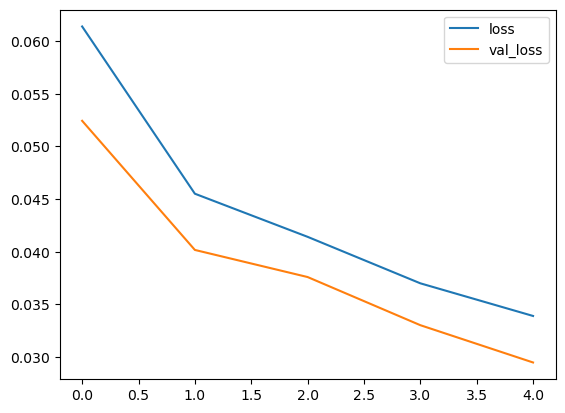

In [106]:
plt.figure(figsize = (8,5))
pd.DataFrame(history.history).plot()
plt.show()

## 4. **MAKING PREDICTION:

In [107]:
input_text = vectorizer("you totally suck! You bitch")

In [111]:
input_text

<tf.Tensor: shape=(1800,), dtype=int64, numpy=array([  7, 951, 397, ...,   0,   0,   0])>

In [112]:
df.columns[2:]

Index(['toxic', 'severe_toxic', 'obscene', 'threat', 'insult',
       'identity_hate'],
      dtype='object')

In [113]:
# model.predict(input_text)
## gives error because our model takes batches as inputs what we are inputting a single value
model.predict(np.array([input_text])) #works

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 56ms/step


array([[0.99977833, 0.31897223, 0.99781114, 0.01747456, 0.9573081 ,
        0.09163225]], dtype=float32)

In [114]:
np.expand_dims(input_text,0)

array([[  7, 951, 397, ...,   0,   0,   0]])

In [115]:
# Or we can even do the following
res = model.predict(np.expand_dims(input_text,0))
res

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 59ms/step


array([[0.99977833, 0.31897223, 0.99781114, 0.01747456, 0.9573081 ,
        0.09163225]], dtype=float32)

In [130]:
batch=test.as_numpy_iterator().next()

In [132]:
test_X,test_y = test.as_numpy_iterator().next()

In [133]:
test_X[5]

array([ 2, 24, 43, ...,  0,  0,  0])

In [134]:
model.predict(test_X)

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 88ms/step


array([[4.1217331e-04, 4.2903021e-13, 6.4832493e-06, 1.1647839e-09,
        8.0021455e-06, 8.9544756e-08],
       [5.6704172e-05, 2.7254656e-16, 5.9486240e-07, 3.8542784e-12,
        5.3460366e-07, 1.2460296e-09],
       [5.1719195e-04, 9.2078092e-13, 8.3852929e-06, 2.2510891e-09,
        1.1279444e-05, 1.7352116e-07],
       [5.2492537e-06, 3.1592865e-20, 2.3646090e-08, 1.6414233e-15,
        1.5656649e-08, 3.1354062e-12],
       [4.8770935e-06, 2.5100555e-20, 2.0102000e-08, 1.1002602e-15,
        1.4521134e-08, 2.6973426e-12],
       [6.9083842e-07, 2.3517835e-24, 1.9229556e-09, 4.7961612e-19,
        6.9352651e-10, 8.4835940e-15],
       [1.2871301e-03, 1.9363388e-11, 2.7222484e-05, 2.0334534e-08,
        3.9729410e-05, 1.1847529e-06],
       [4.3183239e-04, 2.9765134e-13, 8.0548589e-06, 5.2771099e-10,
        8.3533196e-06, 5.8000779e-08],
       [9.1634312e-05, 1.7190814e-15, 9.8840792e-07, 1.6327207e-11,
        1.0426434e-06, 3.8538133e-09],
       [5.3192233e-04, 1.1576945e-12,

In [135]:
(model.predict(test_X) >0.5).astype(int)

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 80ms/step


array([[0, 0, 0, 0, 0, 0],
       [0, 0, 0, 0, 0, 0],
       [0, 0, 0, 0, 0, 0],
       [0, 0, 0, 0, 0, 0],
       [0, 0, 0, 0, 0, 0],
       [0, 0, 0, 0, 0, 0],
       [0, 0, 0, 0, 0, 0],
       [0, 0, 0, 0, 0, 0],
       [0, 0, 0, 0, 0, 0],
       [0, 0, 0, 0, 0, 0],
       [0, 0, 0, 0, 0, 0],
       [1, 0, 0, 0, 0, 0],
       [0, 0, 0, 0, 0, 0],
       [0, 0, 0, 0, 0, 0],
       [0, 0, 0, 0, 0, 0],
       [0, 0, 0, 0, 0, 0]])

In [136]:
test_y

array([[0, 0, 0, 0, 0, 0],
       [0, 0, 0, 0, 0, 0],
       [0, 0, 0, 0, 0, 0],
       [0, 0, 0, 0, 0, 0],
       [0, 0, 0, 0, 0, 0],
       [0, 0, 0, 0, 0, 0],
       [0, 0, 0, 0, 0, 0],
       [0, 0, 0, 0, 0, 0],
       [0, 0, 0, 0, 0, 0],
       [0, 0, 0, 0, 0, 0],
       [0, 0, 0, 0, 0, 0],
       [1, 0, 0, 0, 0, 0],
       [0, 0, 0, 0, 0, 0],
       [0, 0, 0, 0, 0, 0],
       [0, 0, 0, 0, 0, 0],
       [0, 0, 0, 0, 0, 0]])

## 5. **EVALUATING THE MODEL**

In [137]:
from tensorflow.keras.metrics import Precision , Recall, Accuracy

In [138]:
precision = Precision()
recall = Recall()
acc = Accuracy

In [140]:
for batch in test.as_numpy_iterator(): 
    # Unpack the batch 
    X_true, y_true = batch
    # Make a prediction 
    yhat = model.predict(X_true)
    
    # Flatten the predictions
    y_true = y_true.flatten()
    yhat = yhat.flatten()
    
    precision.update_state(y_true, yhat)
    recall.update_state(y_true, yhat)
   # acc.update_state(y_true, yhat)
    
 # Task See catAcc ka usage   

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 81ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 89ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 79ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 71ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 73ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 74ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 78ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 72ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 74ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 75ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 73ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 73ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 74ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 78ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 72ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 78ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 76ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 76ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 76ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 83ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 80ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 77ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 78ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 86ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 92ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 78ms/step
1/1 ━━━━━━━━

2025-06-19 10:57:57.737989: I tensorflow/core/framework/local_rendezvous.cc:407] Local rendezvous is aborting with status: OUT_OF_RANGE: End of sequence


In [141]:
print(f' precsion is {precision.result().numpy()} and recall is {recall.result().numpy()}')

 precsion is 0.8847013711929321 and recall is 0.7703003287315369


## 6. **TEST AND GRADIO**

In [142]:
!pip install gradio jinja2

   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 54.3/54.3 MB 3.3 MB/s eta 0:00:0000:0100:01
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 10.5/10.5 MB 2.4 MB/s eta 0:00:0000:0100:01
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 2.5/2.5 MB 2.1 MB/s eta 0:00:00a 0:00:01
  Attempting uninstall: tomlkit
    Found existing installation: tomlkit 0.11.1
    Uninstalling tomlkit-0.11.1:
      Successfully uninstalled tomlkit-0.11.1


In [143]:
import tensorflow as tf
import gradio as gr

In [145]:
model.save('my_model.keras')


In [146]:
model = tf.keras.models.load_model('my_model.keras')

/opt/anaconda3/lib/python3.12/site-packages/keras/src/saving/saving_lib.py:802: UserWarning: Skipping variable loading for optimizer 'rmsprop', because it has 17 variables whereas the saved optimizer has 2 variables. 
  saveable.load_own_variables(weights_store.get(inner_path))


In [147]:
input_str = vectorizer('hey i freaken hate you!')


In [148]:
res = model.predict(np.expand_dims(input_str,0))


1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 234ms/step


In [150]:
df.columns[2:]

Index(['toxic', 'severe_toxic', 'obscene', 'threat', 'insult',
       'identity_hate'],
      dtype='object')

In [149]:
res

array([[0.7997863 , 0.00412089, 0.09950994, 0.00833956, 0.37124267,
        0.05677456]], dtype=float32)

In [151]:
def score_comment(comment):
    vectorized_comment = vectorizer([comment])
    results = model.predict(vectorized_comment)
    
    text = ''
    for idx, col in enumerate(df.columns[2:]):
        text += '{}: {}\n'.format(col, results[0][idx]>0.5)
    
    return text

In [155]:
interface = gr.Interface(fn=score_comment, 
                         inputs=gr.Textbox(lines=2, placeholder='Comment to score',label="Input Comment"),
                        outputs=gr.Text(label="score") )

In [156]:
interface.launch(share=True)

* Running on local URL:  http://127.0.0.1:7860
* Running on public URL: https://088cf590da7aa103cd.gradio.live

This share link expires in 1 week. For free permanent hosting and GPU upgrades, run `gradio deploy` from the terminal in the working directory to deploy to Hugging Face Spaces (https://huggingface.co/spaces)


1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 63ms/step
